# This is an Exploratory Data Ananlysis(EDA) on famous film director Christopher Nolan's Filmography

# 1. Necessary Libraries installation and importation

In [52]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [53]:
# Import necessary libraries
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for statistical data visualization
from IPython.display import display, HTML  # for displaying HTML content
import tabulate  # for tabulating data

# 2. Loading Dataframe

In [54]:
# Replace 'your_file.csv' and ';' with your actual file path and delimiter
df = pd.read_csv('/Users/rising.volkan007/Desktop/Christopher_Nolan/Christopher Nolan Filmography.csv', delimiter=';')


In [55]:
df.head(10)

,Index,Year,Release Date,Movie Title,Genre,Director,Producer,Writer,Other,Notes,...,Oscar Nominations,Oscar Wins,Directed By,Produced By,Executive Producer,Music By,Cinematography By,Film Editor,Screenplay,Cast
0,1,1989,NaN,Tarantella,Horror,Yes,Yes,Yes,No,Unreleased short film,...,NaN,NaN,"Roko Belic, Christopher Nolan",NaN,NaN,NaN,NaN,NaN,"Roko Belic, Christopher Nolan",NaN
1,2,1996,NaN,Larceny,Crime,Yes,Yes,Yes,No,Unreleased short film,...,NaN,NaN,Christopher Nolan,"Christopher Nolan, Ivan Cornell",Emma Thomas,David Julyan,Christopher Nolan,Christopher Nolan,Christopher Nolan,"Jeremy Theobald, Mark Deighton, Dave Savva"
2,3,1997,NaN,Fearville,NaN,No,No,No,Yes,Camera operator,...,NaN,NaN,Steve Street,Steve Street,NaN,Carl Greep,"Christopher Nolan, Dave Savva",Nigel Karikari,Steve Street,"Alexander McConnell, Andrew Porter, Samantha W..."
3,4,1997,NaN,Doodlebug,Mystery,Yes,Yes,Yes,Yes,Editor and cinematographer\nShort film,...,NaN,NaN,Christopher Nolan,"Emma Thomas, \nChristopher Nolan, \nSteve Street",NaN,David Julyan,Christopher Nolan,Christopher Nolan,NaN,Jeremy Theobald
4,5,1998,12-Sep-98,Following,Mystery,Yes,Yes,Yes,Yes,Editor and cinematographer,...,0.0,0.0,Christopher Nolan,"Christopher Nolan, \nJeremy Theobald, \nEmma T...",NaN,David Julyan,Christopher Nolan,"Gareth Heal, Christopher Nolan",NaN,"Jeremy Theobald, \nAlex Haw, \nLucy Russell, \..."
5,6,1999,09-Jul-99,Genghis Blues,Documentary,No,No,No,Yes,Editorial assistance,...,NaN,NaN,Roko Belic,"Roko Belic, \nAdrian Belic",NaN,"Paul Pena, \nKongar-ol Ondar",NaN,"Roko Belic, Christopher Nolan\nAdrian Belic,",NaN,Paul Pena
6,7,2000,16-Mar-01,Memento,Mystery,Yes,No,Yes,No,NaN,...,2.0,0.0,Christopher Nolan,"Suzanne Todd, \nJennifer Todd",NaN,David Julyan,Wally Pfister,Dody Dorn,Christopher Nolan,"Guy Pearce, \nCarrie-Anne Moss, \nJoe Pantoliano"
7,8,2002,24-May-02,Insomnia,Mystery,Yes,No,No,No,NaN,...,0.0,0.0,Christopher Nolan,"Paul Junger Witt, \nEdward L. McDonnell, \nBro...",NaN,David Julyan,Wally Pfister,Dody Dorn,Hillary Seitz,"Al Pacino, \nRobin Williams, \nHilary Swank, \..."
8,9,2005,15-Jun-05,Batman Begins,Crime,Yes,No,Yes,No,Screenplay co-written with David S. Goyer,...,1.0,0.0,Christopher Nolan,"Charles Roven, \nEmma Thomas, \nLarry Franco",NaN,"Hans Zimmer, James Newton Howard",Wally Pfister,Lee Smith,"Christopher Nolan, \nDavid S. Goyer","Christian Bale, \nMichael Caine, \nLiam Neeson..."
9,10,2006,20-Oct-06,The Prestige,Mystery,Yes,Yes,Yes,No,Co-written with Jonathan Nolan,...,2.0,0.0,Christopher Nolan,"Emma Thomas, \nAaron Ryder, \nChristopher Nolan",NaN,David Julyan,Wally Pfister,Lee Smith,"Jonathan Nolan, \nChristopher Nolan","Hugh Jackman, \nChristian Bale, \nMichael Cain..."


In [56]:
df.columns

Index(['Index', 'Year', 'Release Date', 'Movie Title', 'Genre', 'Director',
       'Producer', 'Writer', 'Other', 'Notes', 'IMDB Rating',
       'IMDB Total Rating', 'Rotten Tomatoes', 'Google Rating', 'Budget($)',
       'Gross Worldwide($)', 'Movie Time Length(Min)', 'Oscar Nominations',
       'Oscar Wins', 'Directed By', 'Produced By', 'Executive Producer',
       'Music By', 'Cinematography By', 'Film Editor', 'Screenplay', 'Cast'],
      dtype='object')

# 3. Data Cleaning

### In the columns where we have catagorical string data and have NaN values. we just replace the NaN values with unknown on those columns

In [57]:

categorical_columns = ['Genre', 'Director', 'Producer', 'Writer', 'Other', 'Notes', 'Directed By', 'Produced By', 'Executive Producer', 'Music By', 'Cinematography By', 'Film Editor', 'Screenplay', 'Cast']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')


In [58]:
# Convert "Release Date" to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%b-%y', errors='coerce')




errors='coerce': This parameter handles errors during conversion. Setting it to 'coerce' means that if there's an error during conversion (e.g., if the date is in an unexpected format), it will replace that value with NaT (Not a Time) instead of raising an error.

In [59]:
# Display the first few rows to check the changes
df.head(10)

,Index,Year,Release Date,Movie Title,Genre,Director,Producer,Writer,Other,Notes,...,Oscar Nominations,Oscar Wins,Directed By,Produced By,Executive Producer,Music By,Cinematography By,Film Editor,Screenplay,Cast
0,1,1989,NaT,Tarantella,Horror,Yes,Yes,Yes,No,Unreleased short film,...,NaN,NaN,"Roko Belic, Christopher Nolan",Unknown,Unknown,Unknown,Unknown,Unknown,"Roko Belic, Christopher Nolan",Unknown
1,2,1996,NaT,Larceny,Crime,Yes,Yes,Yes,No,Unreleased short film,...,NaN,NaN,Christopher Nolan,"Christopher Nolan, Ivan Cornell",Emma Thomas,David Julyan,Christopher Nolan,Christopher Nolan,Christopher Nolan,"Jeremy Theobald, Mark Deighton, Dave Savva"
2,3,1997,NaT,Fearville,Unknown,No,No,No,Yes,Camera operator,...,NaN,NaN,Steve Street,Steve Street,Unknown,Carl Greep,"Christopher Nolan, Dave Savva",Nigel Karikari,Steve Street,"Alexander McConnell, Andrew Porter, Samantha W..."
3,4,1997,NaT,Doodlebug,Mystery,Yes,Yes,Yes,Yes,Editor and cinematographer\nShort film,...,NaN,NaN,Christopher Nolan,"Emma Thomas, \nChristopher Nolan, \nSteve Street",Unknown,David Julyan,Christopher Nolan,Christopher Nolan,Unknown,Jeremy Theobald
4,5,1998,1998-09-12,Following,Mystery,Yes,Yes,Yes,Yes,Editor and cinematographer,...,0.0,0.0,Christopher Nolan,"Christopher Nolan, \nJeremy Theobald, \nEmma T...",Unknown,David Julyan,Christopher Nolan,"Gareth Heal, Christopher Nolan",Unknown,"Jeremy Theobald, \nAlex Haw, \nLucy Russell, \..."
5,6,1999,1999-07-09,Genghis Blues,Documentary,No,No,No,Yes,Editorial assistance,...,NaN,NaN,Roko Belic,"Roko Belic, \nAdrian Belic",Unknown,"Paul Pena, \nKongar-ol Ondar",Unknown,"Roko Belic, Christopher Nolan\nAdrian Belic,",Unknown,Paul Pena
6,7,2000,2001-03-16,Memento,Mystery,Yes,No,Yes,No,Unknown,...,2.0,0.0,Christopher Nolan,"Suzanne Todd, \nJennifer Todd",Unknown,David Julyan,Wally Pfister,Dody Dorn,Christopher Nolan,"Guy Pearce, \nCarrie-Anne Moss, \nJoe Pantoliano"
7,8,2002,2002-05-24,Insomnia,Mystery,Yes,No,No,No,Unknown,...,0.0,0.0,Christopher Nolan,"Paul Junger Witt, \nEdward L. McDonnell, \nBro...",Unknown,David Julyan,Wally Pfister,Dody Dorn,Hillary Seitz,"Al Pacino, \nRobin Williams, \nHilary Swank, \..."
8,9,2005,2005-06-15,Batman Begins,Crime,Yes,No,Yes,No,Screenplay co-written with David S. Goyer,...,1.0,0.0,Christopher Nolan,"Charles Roven, \nEmma Thomas, \nLarry Franco",Unknown,"Hans Zimmer, James Newton Howard",Wally Pfister,Lee Smith,"Christopher Nolan, \nDavid S. Goyer","Christian Bale, \nMichael Caine, \nLiam Neeson..."
9,10,2006,2006-10-20,The Prestige,Mystery,Yes,Yes,Yes,No,Co-written with Jonathan Nolan,...,2.0,0.0,Christopher Nolan,"Emma Thomas, \nAaron Ryder, \nChristopher Nolan",Unknown,David Julyan,Wally Pfister,Lee Smith,"Jonathan Nolan, \nChristopher Nolan","Hugh Jackman, \nChristian Bale, \nMichael Cain..."


# 4. Exploratory Data Analysis

### Filtering movies that are directed by Christopher Nolan

In [72]:
# Filter movies directed by Christopher Nolan
nolan_movies = df[df['Directed By'].str.contains('Christopher Nolan', case=False, na=False)]

# Display relevant information
nolan_movies_info = nolan_movies[['Movie Title', 'Genre', 'IMDB Rating','Year']]

# Display the relevant information using tabulate
table_nolan_movies_info = tabulate.tabulate(nolan_movies_info, headers='keys', tablefmt='html', showindex=False)

# Display the HTML table for movies directed by Christopher Nolan
display(HTML(table_nolan_movies_info))


Movie Title,Genre,IMDB Rating,Year
Tarantella,Horror,5.3,1989
Larceny,Crime,6.4,1996
Doodlebug,Mystery,7,1997
Following,Mystery,7.5,1998
Memento,Mystery,8.4,2000
Insomnia,Mystery,7.2,2002
Batman Begins,Crime,8.2,2005
The Prestige,Mystery,8.5,2006
The Dark Knight,Crime,9,2008
Inception,Science Fiction,8.8,2010


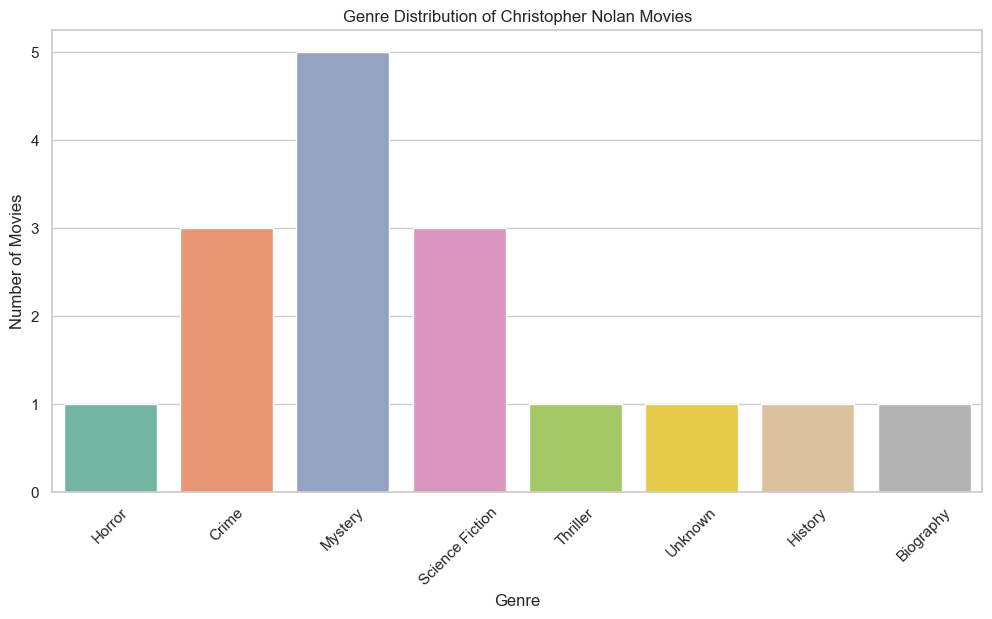

In [61]:
# Bar chart for genre distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=nolan_movies, palette='Set2')
plt.title('Genre Distribution of Christopher Nolan Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

Nolan has directed mostly films under mystery genre along with crime and science fiction genre.

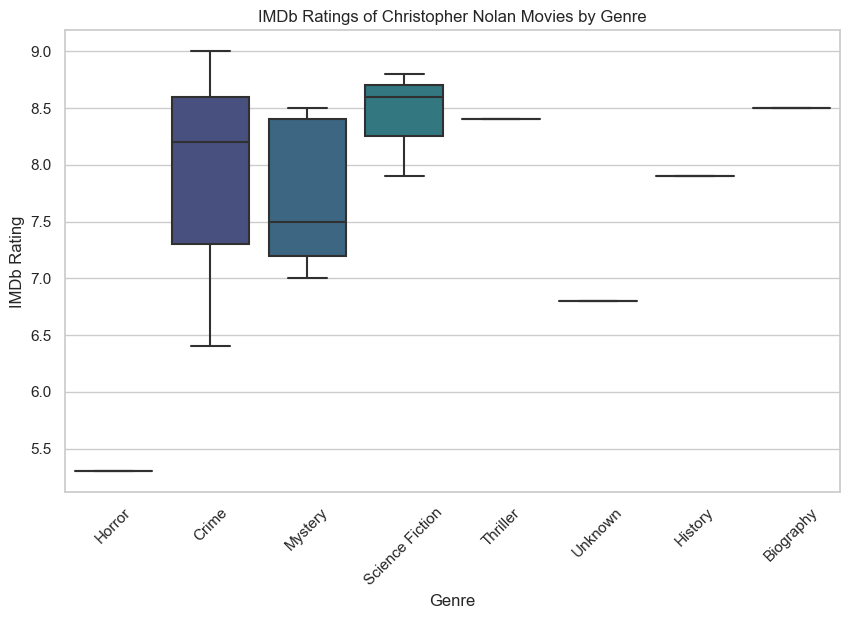

In [62]:
# Box plot for IMDb ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='IMDB Rating', data=nolan_movies, palette='viridis')
plt.title('IMDb Ratings of Christopher Nolan Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.show()


In [63]:
# Filter movies directed by Christopher Nolan
nolan_movies = df[df['Directed By'].str.contains('Christopher Nolan', case=False, na=False)]

# Find the highest-rated movies
highest_rated_movies = nolan_movies.sort_values(by='IMDB Rating', ascending=False).head(5)

# Display relevant information
result = highest_rated_movies[['Movie Title', 'IMDB Rating', 'Writer', 'Notes']]
# Display the relevant information using tabulate
table_highest_rated_movies = tabulate.tabulate(result, headers='keys', tablefmt='html', showindex=False)

# Display the HTML table for highest-rated movies directed by Christopher Nolan
display(HTML(table_highest_rated_movies))


Movie Title,IMDB Rating,Writer,Notes
The Dark Knight,9,Yes,Story co-written with David S. Goyer Screenplay co-written with Jonathan Nolan
Inception,8.8,Yes,Unknown
Interstellar,8.6,Yes,Co-written with Jonathan Nolan
The Prestige,8.5,Yes,Co-written with Jonathan Nolan
Oppenheimer,8.5,Yes,Unknown


The Dark Knight was his highest rated directional film. This is the film featuring DC comics superhero character Batman and Joker.

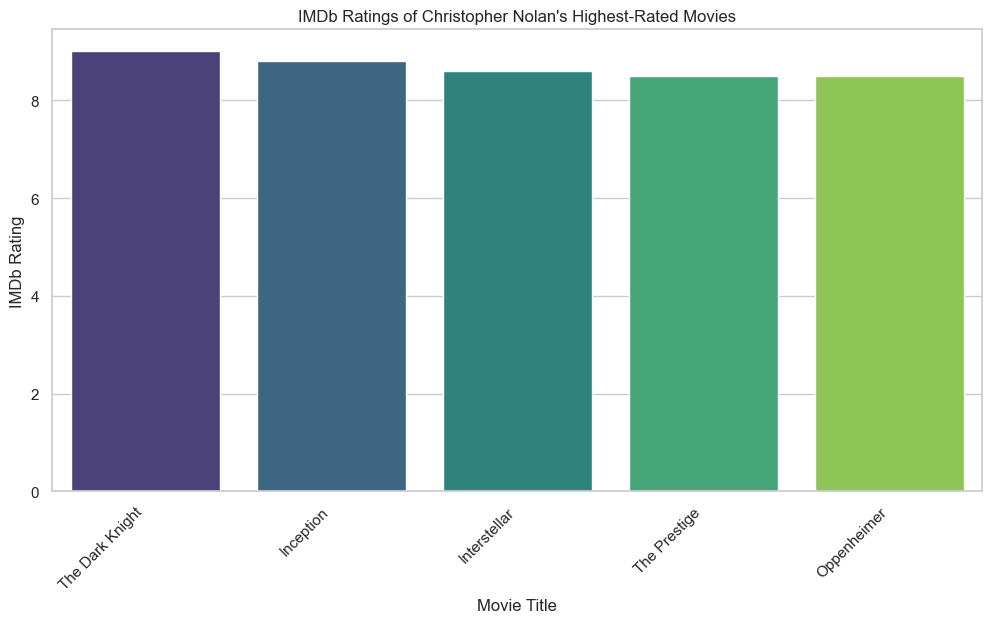

In [64]:
# Bar chart for IMDb ratings
plt.figure(figsize=(12, 6))
sns.barplot(x='Movie Title', y='IMDB Rating', data=result, palette='viridis')
plt.title('IMDb Ratings of Christopher Nolan\'s Highest-Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [71]:

# Drop rows with missing gross worldwide values
nolan_movies = nolan_movies.dropna(subset=['Gross Worldwide($)'])

# Convert the 'Gross Worldwide($)' column to numeric
nolan_movies['Gross Worldwide($)'] = pd.to_numeric(nolan_movies['Gross Worldwide($)'], errors='coerce')

# Sort the DataFrame by Gross Worldwide earnings in descending order and select the top 5
top_nolan_earning_movies = nolan_movies.sort_values(by='Gross Worldwide($)', ascending=False).head(5)

# Custom function to format the amount in million/billion
def format_amount(amount):
    if amount >= 1e9:
        return f"${amount / 1e9:.2f} Billion"
    elif amount >= 1e6:
        return f"${amount / 1e6:.2f} Million"
    elif amount >= 1e3:
        return f"${amount / 1e3:.2f} Thousand"
    else:
        return f"${amount:.2f}"

# Apply the formatting function to the 'Gross Worldwide($)' column
top_nolan_earning_movies['Gross Worldwide($)'] = top_nolan_earning_movies['Gross Worldwide($)'].apply(format_amount)

# Display the relevant information using tabulate
table_earning_movies = tabulate.tabulate(top_nolan_earning_movies[['Movie Title', 'Gross Worldwide($)','Year']], headers='keys', tablefmt='html', showindex=False)

# Display the HTML table for top 5 earning movies directed by Christopher Nolan
display(HTML(table_earning_movies))

Movie Title,Gross Worldwide($),Year
The Dark Knight Rises,$1.08 Billion,2012
The Dark Knight,$1.00 Billion,2008
Oppenheimer,$949.00 Million,2023
Inception,$829.90 Million,2010
Interstellar,$677.47 Million,2014


We can see from the table is that The Dark Knight Rises and The Dark Knight were the highest earning Nolan films that crosses Billion Dollars and Meanwhile His recent directed film Oppenheimer is crossing nearly to the Billion Dollar Mark.

/tmp/ipykernel_7658/1490655674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nolan_director_movies['Budget($)'] = pd.to_numeric(nolan_director_movies['Budget($)'], errors='coerce')
/tmp/ipykernel_7658/1490655674.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nolan_director_movies['Gross Worldwide($)'] = pd.to_numeric(nolan_director_movies['Gross Worldwide($)'], errors='coerce')
/tmp/ipykernel_7658/1490655674.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

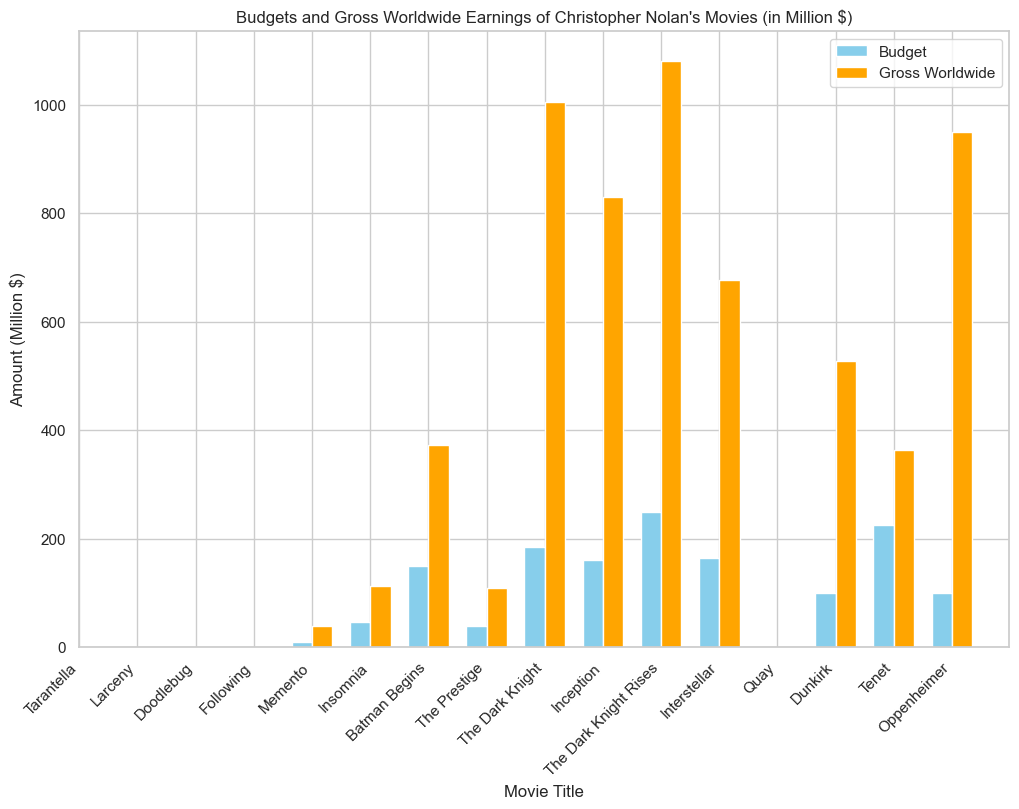

In [66]:


# Filter movies where Nolan is the director
nolan_director_movies = df[df['Directed By'].str.contains('Christopher Nolan', case=False, na=False)]

# Convert budget and gross worldwide to numeric values
nolan_director_movies['Budget($)'] = pd.to_numeric(nolan_director_movies['Budget($)'], errors='coerce')
nolan_director_movies['Gross Worldwide($)'] = pd.to_numeric(nolan_director_movies['Gross Worldwide($)'], errors='coerce')

# Convert amounts to millions for better readability
nolan_director_movies['Budget($)/Million'] = nolan_director_movies['Budget($)'] / 1e6
nolan_director_movies['Gross Worldwide($)/Million'] = nolan_director_movies['Gross Worldwide($)'] / 1e6

# Set the style for the plot
sns.set(style="whitegrid")

# Create a grouped bar chart for budgets and gross worldwide earnings
plt.figure(figsize=(12, 8))

# Plot Budgets and Gross Worldwide Earnings side by side
bar_width = 0.35
bar_positions = range(len(nolan_director_movies))

plt.bar(bar_positions, nolan_director_movies['Budget($)/Million'], width=bar_width, color='skyblue', label='Budget')
plt.bar([pos + bar_width for pos in bar_positions], nolan_director_movies['Gross Worldwide($)/Million'], width=bar_width, color='orange', label='Gross Worldwide')

# Add labels and title
plt.title('Budgets and Gross Worldwide Earnings of Christopher Nolan\'s Movies (in Million $)')
plt.xlabel('Movie Title')
plt.ylabel('Amount (Million $)')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], nolan_director_movies['Movie Title'], rotation=45, ha='right')
plt.legend()

# Show the plot
plt.show()


Nolan's theatrical movie direction started from actually by directing the film Following. "The Following" is a 1998 mystery thriller film, written and directed by Christopher Nolan, marking his directorial debut. Shot on a shoestring budget, the film gained recognition for its nonlinear narrative which was made on a modest budget of around $6,000. and set the stage for Nolan's later success in the filmmaking industry.

In [73]:
# Filter movies directed by Christopher Nolan
nolan_movies = df[df['Directed By'].str.contains('Christopher Nolan', case=False, na=False)]

# Drop rows with missing Rotten Tomatoes ratings
nolan_movies = nolan_movies.dropna(subset=['Rotten Tomatoes'])

# Sort the DataFrame by Rotten Tomatoes rating in descending order and select the top 5
top_nolan_rotten_tomatoes = nolan_movies.sort_values(by='Rotten Tomatoes', ascending=False).head(5)

# Display the relevant information
result_rotten_tomatoes = top_nolan_rotten_tomatoes[['Movie Title', 'Rotten Tomatoes','Year']]

# Display the relevant information using tabulate
table_rotten_tomatoes = tabulate.tabulate(result_rotten_tomatoes, headers='keys', tablefmt='html', showindex=False)

# Display the HTML table for top 5 movies based on Rotten Tomatoes ratings
display(HTML(table_rotten_tomatoes))

Movie Title,Rotten Tomatoes,Year
The Dark Knight,9.4,2008
Memento,9.3,2000
Oppenheimer,9.3,2023
Insomnia,9.2,2002
Dunkirk,9.2,2017


In Rotten Tomatoes Fresh Rating, The Dark Knight still holding the highest fresh rating which is around 94%.


In [70]:
# Drop rows with missing movie time length values
nolan_movies = nolan_movies.dropna(subset=['Movie Time Length(Min)'])

# Convert the 'Movie Time Length(Min)' column to numeric
nolan_movies['Movie Time Length(Min)'] = pd.to_numeric(nolan_movies['Movie Time Length(Min)'], errors='coerce')

# Sort the DataFrame by movie time length in descending order and select the top 10
top_nolan_movies_by_time = nolan_movies.sort_values(by='Movie Time Length(Min)', ascending=False).head(10)

# Display the relevant information using tabulate
table_top_movies_by_time = tabulate.tabulate(top_nolan_movies_by_time[['Movie Title', 'Movie Time Length(Min)', 'Year']], headers='keys', tablefmt='html', showindex=False)

# Display the HTML table for top 10 movies by time length directed by Christopher Nolan
display(HTML(table_top_movies_by_time))




Movie Title,Movie Time Length(Min),Year
Oppenheimer,180,2023
Interstellar,169,2014
The Dark Knight Rises,165,2012
The Dark Knight,152,2008
Tenet,150,2020
Inception,148,2010
Batman Begins,140,2005
The Prestige,130,2006
Insomnia,118,2002
Memento,113,2000


Recently Release film Oppenheimer(2023) is the longest Movie(min) around 180 minute.

In [74]:
# Filter movies directed by Christopher Nolan
nolan_movies = df[df['Directed By'].str.contains('Christopher Nolan', case=False, na=False)]

# Drop rows with missing movie time length values
nolan_movies = nolan_movies.dropna(subset=['Movie Time Length(Min)'])

# Convert the 'Movie Time Length(Min)' column to numeric
nolan_movies['Movie Time Length(Min)'] = pd.to_numeric(nolan_movies['Movie Time Length(Min)'], errors='coerce')

# Sort the DataFrame by movie time length in ascending order and select the top 3 shortest movies
top3_shortest_nolan_movies = nolan_movies.sort_values(by='Movie Time Length(Min)').head(5)

# Display the relevant information using tabulate
table_top3_shortest_movies = tabulate.tabulate(top3_shortest_nolan_movies[['Movie Title', 'Movie Time Length(Min)','Year']], headers='keys', tablefmt='html', showindex=False)

# Display the HTML table for the top 3 shortest movies directed by Christopher Nolan
display(HTML(table_top3_shortest_movies))

Movie Title,Movie Time Length(Min),Year
Doodlebug,3,1997
Tarantella,4,1989
Quay,8,2015
Following,69,1998
Dunkirk,106,2017


Doodlebug which was a short film directed by Nolan was his shortest film direction. But in terms of full fledged films, Following is the shortest film ever around 69 min and Dunkirk 106 min.

In [38]:
# Filter movies with non-null Oscar nominations or wins
nolan_movies_with_oscar = nolan_movies.dropna(subset=['Oscar Nominations', 'Oscar Wins'], how='all')

# Display the relevant information using tabulate
table_oscar_info_filtered = tabulate.tabulate(nolan_movies_with_oscar[['Movie Title', 'Oscar Nominations', 'Oscar Wins']], headers='keys', tablefmt='html', showindex=False)

# Display the HTML table for Oscar nominations and wins in movies directed by Christopher Nolan (filtered)
display(HTML(table_oscar_info_filtered))

Movie Title,Oscar Nominations,Oscar Wins
Following,0,0
Memento,2,0
Insomnia,0,0
Batman Begins,1,0
The Prestige,2,0
The Dark Knight,6,2
Inception,8,4
The Dark Knight Rises,0,0
Interstellar,5,1
Dunkirk,8,3


These are the movies that received Oscar Nomination and wins.

In [39]:
# Sort the DataFrame by IMDB Rating in descending order and select the top 10 movies
top10_nolan_movies = nolan_movies.sort_values(by='IMDB Rating', ascending=False).head(10)

# Display the relevant information using tabulate
table_top10_movies_producers = tabulate.tabulate(top10_nolan_movies[['Movie Title', 'IMDB Rating', 'Produced By', 'Executive Producer']], headers='keys', tablefmt='html', showindex=False)

# Display the HTML table for top 10 movies with producers and executive producers
display(HTML(table_top10_movies_producers))

Movie Title,IMDB Rating,Produced By,Executive Producer
The Dark Knight,9,"Emma Thomas, Charles Roven, Christopher Nolan",Unknown
Inception,8.8,"Emma Thomas, Christopher Nolan",Unknown
Interstellar,8.6,"Emma Thomas, Christopher Nolan, Lynda Obst",Unknown
The Prestige,8.5,"Emma Thomas, Aaron Ryder, Christopher Nolan",Unknown
Oppenheimer,8.5,"Charles Roven, Christopher Nolan, Emma Thomas","Christopher Nolan, Emma Thomas"
Memento,8.4,"Suzanne Todd, Jennifer Todd",Unknown
The Dark Knight Rises,8.4,"Emma Thomas, Christopher Nolan, Charles Roven",Unknown
Batman Begins,8.2,"Charles Roven, Emma Thomas, Larry Franco",Unknown
Dunkirk,7.9,"Emma Thomas, Christopher Nolan",Unknown
Tenet,7.9,Unknown,Unknown


Here we can see the producers of his movies and we can notice that most of his films have joint producers multiple persons and mostly including his wife Emma Thomas.

In [40]:
# Sort the DataFrame by IMDB Rating in descending order and select the top 10 movies
top10_nolan_movies = nolan_movies.sort_values(by='IMDB Rating', ascending=False).head(10)

#Display the relevant information using tabulate
top10_nolan_movies_music_by= tabulate.tabulate(top10_nolan_movies[['Movie Title','IMDB Rating','Music By']], headers='keys', tablefmt='html', showindex=False)

#Display the HTML table for top 10 movies, IMDB ratings and Music By

display(HTML(top10_nolan_movies_music_by))

Movie Title,IMDB Rating,Music By
The Dark Knight,9,"Hans Zimmer, James Newton Howard"
Inception,8.8,Hans Zimmer
Interstellar,8.6,Hans Zimmer
The Prestige,8.5,David Julyan
Oppenheimer,8.5,Ludwig Göransson
Memento,8.4,David Julyan
The Dark Knight Rises,8.4,Hans Zimmer
Batman Begins,8.2,"Hans Zimmer, James Newton Howard"
Dunkirk,7.9,Hans Zimmer
Tenet,7.9,Ludwig Göransson


The Background music in Nolan's films are top noch because his most films were collaborated with the famous music direction Hans Zimmer who is also an Academy winner (Oscar). In his recent films like Tenet, Oppenheimer we can see a new music directior named Ludwig Göransson. He is also getting popularity.

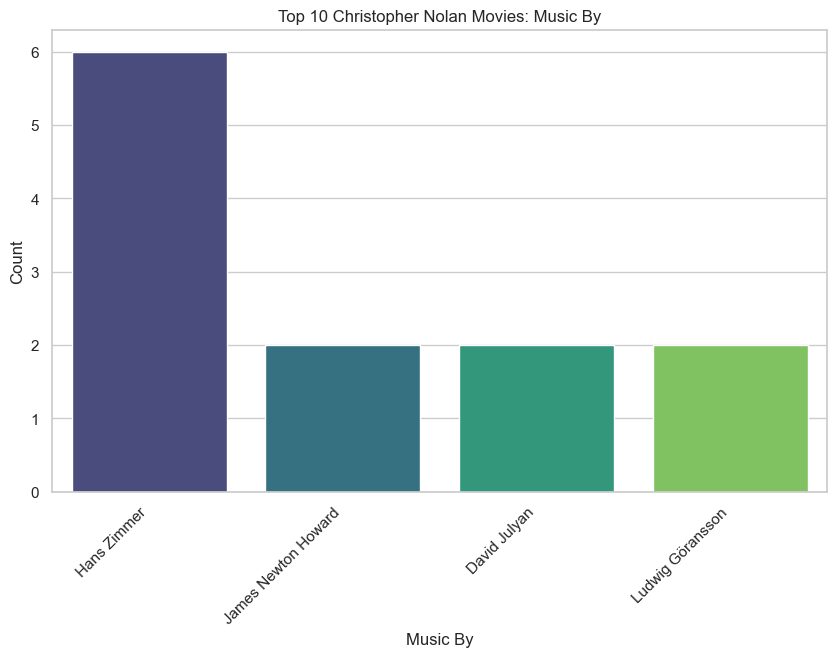

In [41]:
# Sort the DataFrame by IMDB Rating in descending order and select the top 10 movies
top10_nolan_movies = nolan_movies.sort_values(by='IMDB Rating', ascending=False).head(10)

# Extract and flatten the 'Music By' column, then count occurrences
music_by_counts = top10_nolan_movies['Music By'].str.split(', ').explode().value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=music_by_counts.index, y=music_by_counts.values, palette='viridis')
plt.title('Top 10 Christopher Nolan Movies: Music By')
plt.xlabel('Music By')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [75]:
# Sort the DataFrame by IMDB Rating in descending order and select the top 10 movies
top10_nolan_movies = nolan_movies.sort_values(by='IMDB Rating', ascending=False).head(10)

#Display the relevant information using tabulate
top10_nolan= tabulate.tabulate(top10_nolan_movies[['Movie Title','IMDB Rating','Year','Cinematography By','Film Editor','Screenplay']], headers='keys', tablefmt='html', showindex=False)

#Display the HTML table for top 10 movies, IMDB ratings and Music By

display(HTML(top10_nolan))

Movie Title,IMDB Rating,Year,Cinematography By,Film Editor,Screenplay
The Dark Knight,9,2008,Wally Pfister,Lee Smith,"Jonathan Nolan, Christopher Nolan"
Inception,8.8,2010,Wally Pfister,Lee Smith,Christopher Nolan
Interstellar,8.6,2014,Hoyte Van Hoytema,Lee Smith,"Jonathan Nolan, Christopher Nolan"
The Prestige,8.5,2006,Wally Pfister,Lee Smith,"Jonathan Nolan, Christopher Nolan"
Oppenheimer,8.5,2023,Hoyte Van Hoytema,Jennifer Lame,Christopher Nolan
Memento,8.4,2000,Wally Pfister,Dody Dorn,Christopher Nolan
The Dark Knight Rises,8.4,2012,Wally Pfister,Lee Smith,"Jonathan Nolan, Christopher Nolan"
Batman Begins,8.2,2005,Wally Pfister,Lee Smith,"Christopher Nolan, David S. Goyer"
Dunkirk,7.9,2017,Hoyte van Hoytema,Lee Smith,Christopher Nolan
Tenet,7.9,2020,Hoyte Van Hoytema,Jennifer Lame,Christopher Nolan


These are the list of Cinematographer and Film editor of Nolan's films. We can see most of the films film editor was Lee Smith but in recent films like Tenet and Oppenheimer we can see a new editor named Jennifer Lame. And most of Nolan's films screenplay were written along with Christopher Nolan and his Brother Jonathan Nolan.

In [43]:
# Extract and flatten the 'Cast' column, then count occurrences
cast_counts = nolan_movies['Cast'].str.split(', ').explode().value_counts()

# Select the most frequent cast member
top_cast = cast_counts.index[0]

# Filter movies where the selected cast member is present
movies_with_top_cast = nolan_movies[nolan_movies['Cast'].str.contains(top_cast, case=False, na=False)]

# Display the relevant information using tabulate
table_top_cast_movies = tabulate.tabulate(movies_with_top_cast[['Movie Title', 'IMDB Rating', 'Cast']], headers='keys', tablefmt='html', showindex=False)

# Display the HTML table for top 10 movies with the most frequent cast member
display(HTML(table_top_cast_movies))

Movie Title,IMDB Rating,Cast
Batman Begins,8.2,"Christian Bale, Michael Caine, Liam Neeson, Katie Holmes, Gary Oldman, Cillian Murphy, Tom Wilkinson, Rutger Hauer, Ken Watanabe, Morgan Freeman"
The Prestige,8.5,"Hugh Jackman, Christian Bale, Michael Caine, Scarlett Johansson, Rebecca Hall, Andy Serkis, David Bowie"
The Dark Knight,9,"Christian Bale, Michael Caine, Heath Ledger, Gary Oldman, Aaron Eckhart, Maggie Gyllenhaal, Morgan Freeman"
Inception,8.8,"Leonardo DiCaprio, Ken Watanabe, Joseph Gordon-Levitt, Marion Cotillard, Ellen Page, Tom Hardy, Cillian Murphy, Tom Berenger, Michael Caine"
The Dark Knight Rises,8.4,"Christian Bale, Michael Caine, Gary Oldman, Anne Hathaway, Tom Hardy, Marion Cotillard, Joseph Gordon-Levitt, Morgan Freeman"
Interstellar,8.6,"Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Michael Caine"


In [44]:
# Print unique values in the 'Cast' column
unique_cast_values = nolan_movies['Cast'].unique()
print(unique_cast_values)


['Unknown' 'Jeremy Theobald'
 'Jeremy Theobald, \nAlex Haw, \nLucy Russell, \nJohn Nolan'
 'Guy Pearce, \nCarrie-Anne Moss, \nJoe Pantoliano'
 'Al Pacino, \nRobin Williams, \nHilary Swank, \nMaura Tierney, \nMartin Donovan, \nNicky Katt, \nPaul Dooley'
 'Christian Bale, \nMichael Caine, \nLiam Neeson, \nKatie Holmes, \nGary Oldman, \nCillian Murphy, \nTom Wilkinson, \nRutger Hauer, \nKen Watanabe, \nMorgan Freeman'
 'Hugh Jackman, \nChristian Bale, \nMichael Caine, \nScarlett Johansson, \nRebecca Hall, \nAndy Serkis, \nDavid Bowie'
 'Christian Bale, \nMichael Caine, \nHeath Ledger, \nGary Oldman, \nAaron Eckhart, \nMaggie Gyllenhaal, \nMorgan Freeman'
 'Leonardo DiCaprio, \nKen Watanabe,\nJoseph Gordon-Levitt, \nMarion Cotillard, \nEllen Page, \nTom Hardy, \nCillian Murphy, \nTom Berenger, \nMichael Caine'
 'Christian Bale, \nMichael Caine, \nGary Oldman, \nAnne Hathaway, \nTom Hardy, \nMarion Cotillard, \nJoseph Gordon-Levitt, \nMorgan Freeman'
 'Matthew McConaughey, \nAnne Hathaway, 

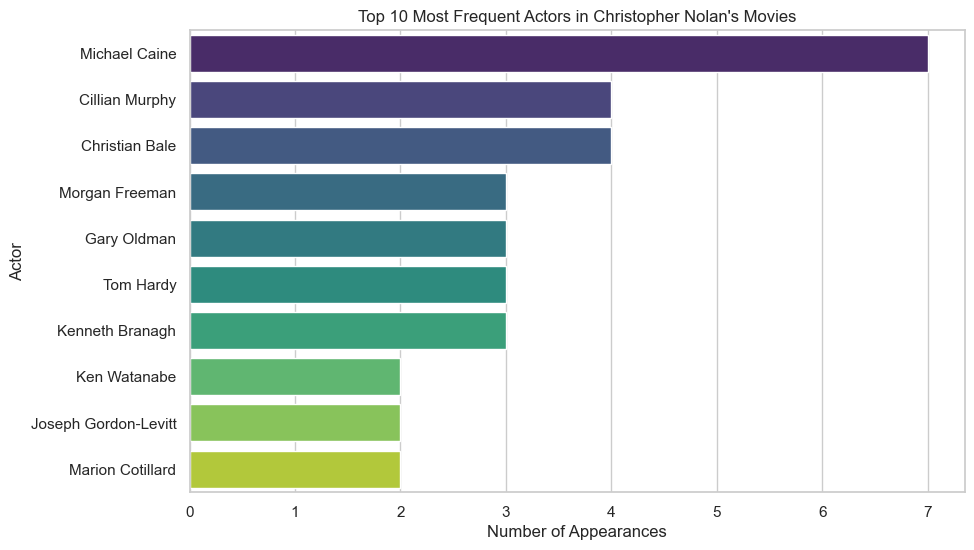

In [45]:

# Convert the 'Cast' column to a list of names
cast_list = nolan_movies['Cast'].str.replace('\s*,\s*', ',').str.split(',').explode().str.strip()

# Count the occurrences of each actor
cast_counts = cast_list.value_counts()

# Select the top 10 actors
top_10_cast = cast_counts.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cast.values, y=top_10_cast.index, palette='viridis')
plt.title("Top 10 Most Frequent Actors in Christopher Nolan's Movies")
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()




From the cast of Nolan's every films we can see Micheal Cane was frequently collaborated in seveal roles. He appeared in 7 of Nolan's films.

# 5. Conclusion

In this extensive exploratory data analysis (EDA) of Christopher Nolan's filmography, we delved into various aspects of his career, ranging from the early years to his blockbuster successes. We successfully loaded, cleaned, and visualized the dataset, shedding light on key attributes such as movie ratings, earnings, cast, and crew details.

Through the analysis, we uncovered interesting insights, including the fact that Michael Caine is the most frequently featured actor in Nolan's films. We also examined Nolan's top-rated movies, highest-grossing films, and those with significant Oscar recognition. The study not only showcased Nolan's evolution as a filmmaker but also highlighted the unique characteristics of his work, such as the nonlinear narrative in his debut film, "The Following."

Throughout the project, we utilized Python libraries like Pandas, Matplotlib, Seaborn, and Tabulate, showcasing the power of these tools in conducting a comprehensive EDA. This analysis serves as a valuable resource for film enthusiasts and researchers interested in understanding the nuances of Christopher Nolan's illustrious career.